<a href="https://colab.research.google.com/github/atul219/Facial_Keypoints/blob/master/Facial_Keypoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [536]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [537]:
dataset_directory='/content/gdrive/My Drive/Facial_Keypoints/data'
dataset_directory

'/content/gdrive/My Drive/Facial_Keypoints/data'

In [0]:
#!unzip "/content/gdrive/My Drive/Facial_Keypoints/data/test.zip"
#!unzip "/content/gdrive/My Drive/Facial_Keypoints/data/training.zip"

#from zipfile import ZipFile
#file_name = dataset_directory + '/' + 'test.zip'

#with ZipFile(file_name , 'r') as zip:
#  zip.extractall()
#  print('Done')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
import time
import pandas as pd


In [0]:
haar_cascade = ('/content/gdrive/My Drive/Facial_Keypoints/detector_architectures/')
# load the image
image_dir = ('/content/gdrive/My Drive/Facial_Keypoints/images/')

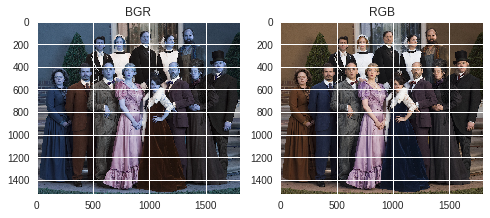

In [541]:

image = cv2.imread(image_dir + 'test_image_1.jpg')

# convert image to rgb
rgb = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

fig , axs = plt.subplots(1,2 , figsize = (8,8))
axs[0].set_title("BGR")
axs[0].imshow(image)
axs[1].set_title("RGB")
axs[1].imshow(rgb)

In [542]:
# convert rgb to gray
gray = cv2.cvtColor(rgb , cv2.COLOR_RGB2GRAY)

# extract the faces
face_cascade = cv2.CascadeClassifier(haar_cascade + 'haarcascade_frontalface_default.xml')

# detect faces in the image
faces = face_cascade.detectMultiScale(gray,4,6)

# print no of faces detected
print("Total Faces detected: " ,len(faces))

Total Faces detected:  13


In [0]:
# make copy of rgb image to draw faces
image_copy = np.copy(rgb)

# get bounding boxes
for (x,y,w,h) in faces:
    # add bounding box
    cv2.rectangle(image_copy,(x,y) , (x+w , y+h) ,(255,0,0) ,3)

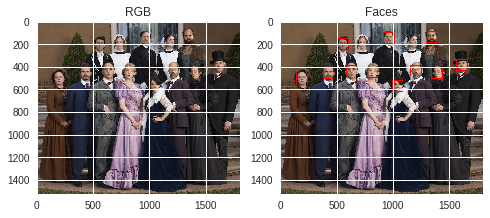

In [544]:
fig , axs = plt.subplots(1,2 , figsize = (8,8))
axs[0].set_title("RGB")
axs[0].imshow(rgb)
axs[1].set_title("Faces")
axs[1].imshow(image_copy)

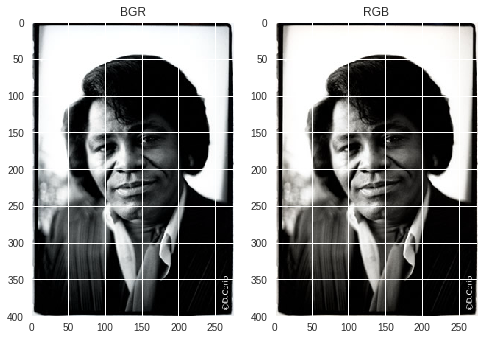

In [545]:
# EYE Detection
image = cv2.imread(image_dir + 'james.jpg')

rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

fig , axs = plt.subplots(1,2 , figsize = (8,8))
axs[0].set_title("BGR")
axs[0].imshow(image)
axs[1].set_title("RGB")
axs[1].imshow(rgb)

In [0]:
# convert into gray scale
gray = cv2.cvtColor(rgb , cv2.COLOR_RGB2GRAY)

image_copy = np.copy(rgb)

eye_cascade = cv2.CascadeClassifier( haar_cascade + 'haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(image_copy)

for (x,y,w,h) in faces:
    # rect for face
    cv2.rectangle(image_copy , (x,y), (x+w , y+h) , (255,0,0),3)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(image_copy , (ex,ey) , (ex+ew , ey+eh) , (0,255,0) , 2)
        

     

In [0]:
face_cascade = cv2.CascadeClassifier(haar_cascade + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(haar_cascade +'haarcascade_eye.xml')

def cap_video():
    cv2.namedWindow("Face Detection")
    cap = cv2.VideoCapture(0)
    
    if cap.isOpened():
        ret , img = cap.read()
        
    else:
        ret  = False

    while ret:
        rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(rgb , cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray , 4,6)
        image_copy = np.copy(rgb)

        for (x,y,w,h) in faces:
        # rect for face
            cv2.rectangle(image_copy , (x,y), (x+w , y+h) , (255,0,0),3)
            eyes = eye_cascade.detectMultiScale(image_copy)
            for (ex,ey,ew,eh) in eyes:

                cv2.rectangle(image_copy , (ex,ey) , (ex+ew , ey+eh) , (0,255,0) , 2)

        cv2.imshow('img' , image_copy)
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            # Destroy windows 
            cv2.destroyAllWindows()

            # Make sure window closes on OSx
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = cap.read()

In [0]:
#cap_video()

In [0]:
# Noisy Image
image = cv2.imread(image_dir + 'test_image_1.jpg')

rgb = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)

# noise image array
noisy_img = np.asarray(image)

# set noise level and add multiply with the copy image 
noise_level = 40
noise = np.random.randn(image.shape[0] , image.shape[1] , image.shape[2])*noise_level

# convert into unit8 format
noisy_img = np.asarray([(np.clip(i,0,255)) for i in noisy_img])

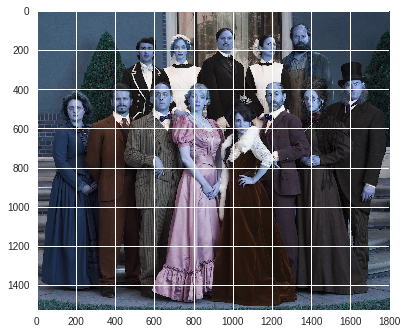

In [550]:
plt.imshow(noisy_img)

In [0]:
# make copy of rgb image to draw faces
noisy_img = cv2.cvtColor(noisy_img , cv2.COLOR_BGR2RGB)
image_copy = np.copy(noisy_img)
faces = face_cascade.detectMultiScale(noisy_img , 4,6)

# get bounding boxes
for (x,y,w,h) in faces:
    # add bounding box
    cv2.rectangle(noisy_img,(x,y) , (x+w , y+h) ,(255,0,0) ,3)

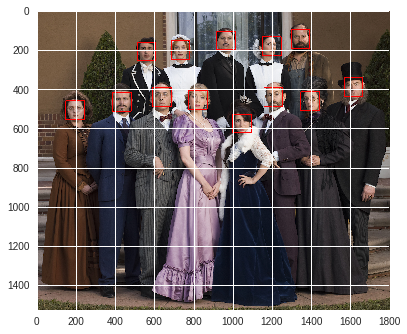

In [552]:
plt.imshow(noisy_img)

**To Load Data**

In [0]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.models import load_model
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle

In [0]:
def load_data(test=False):
    """
    Loads data from FTEST if *test* is True, otherwise from FTRAIN.
    Important that the files are in a `data` directory
    """  
    FTRAIN = 'training.csv'
    FTEST = 'test.csv'
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname))  # load dataframes
   

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    df = df.dropna()  # drop all rows that have missing values in them

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)
    X = X.reshape(-1, 96, 96, 1) # return each images as 96 x 96 x 1

    if not test:  # only FTRAIN has target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y

**Plot Data**

In [0]:
def plot_data(img, landmarks, axis):
    """
    Plot image (img), along with normalized facial keypoints (landmarks)
    """
    axis.imshow(np.squeeze(img), cmap='gray') # plot the image
    landmarks = landmarks * 48 + 48 # undo the normalization
    # Plot the keypoints
    axis.scatter(landmarks[0::2], 
        landmarks[1::2], 
        marker='o', 
        c='c', 
        s=40)

**Plot Key Points**

In [0]:
def plot_keypoints(img_path, 
                  face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_alt.xml'),
                  model_path='my_model.h5'):
    # TODO: write a function that plots keypoints on arbitrary image containing human
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
    ax.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))

    if len(faces) == 0:
        plt.title('no faces detected')
    elif len(faces) > 1:
        plt.title('too many faces detected')
        for (x,y,w,h) in faces:
            rectangle = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
            ax.imshow(cv2.cvtColor(rectangle, cv2.COLOR_BGR2RGB))
    elif len(faces) == 1:
        plt.title('one face detected')
        x,y,w,h = faces[0]
        bgr_crop = img[y:y+h, x:x+w] 
        orig_shape_crop = bgr_crop.shape
        gray_crop = cv2.cvtColor(bgr_crop, cv2.COLOR_BGR2GRAY)
        resize_gray_crop = cv2.resize(gray_crop, (96, 96)) / 255.
        model = load_model(model_path)
        landmarks = np.squeeze(model.predict(
            np.expand_dims(np.expand_dims(resize_gray_crop, axis=-1), axis=0)))
        ax.scatter(((landmarks[0::2] * 48 + 48)*orig_shape_crop[0]/96)+x, 
                   ((landmarks[1::2] * 48 + 48)*orig_shape_crop[1]/96)+y, 
                   marker='o', c='c', s=40)
    plt.show()


**Load Training and Testing Data**

In [557]:
# loading training set
X_train , y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996


In [558]:
# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

X_test.shape == (1783, 96, 96, 1)


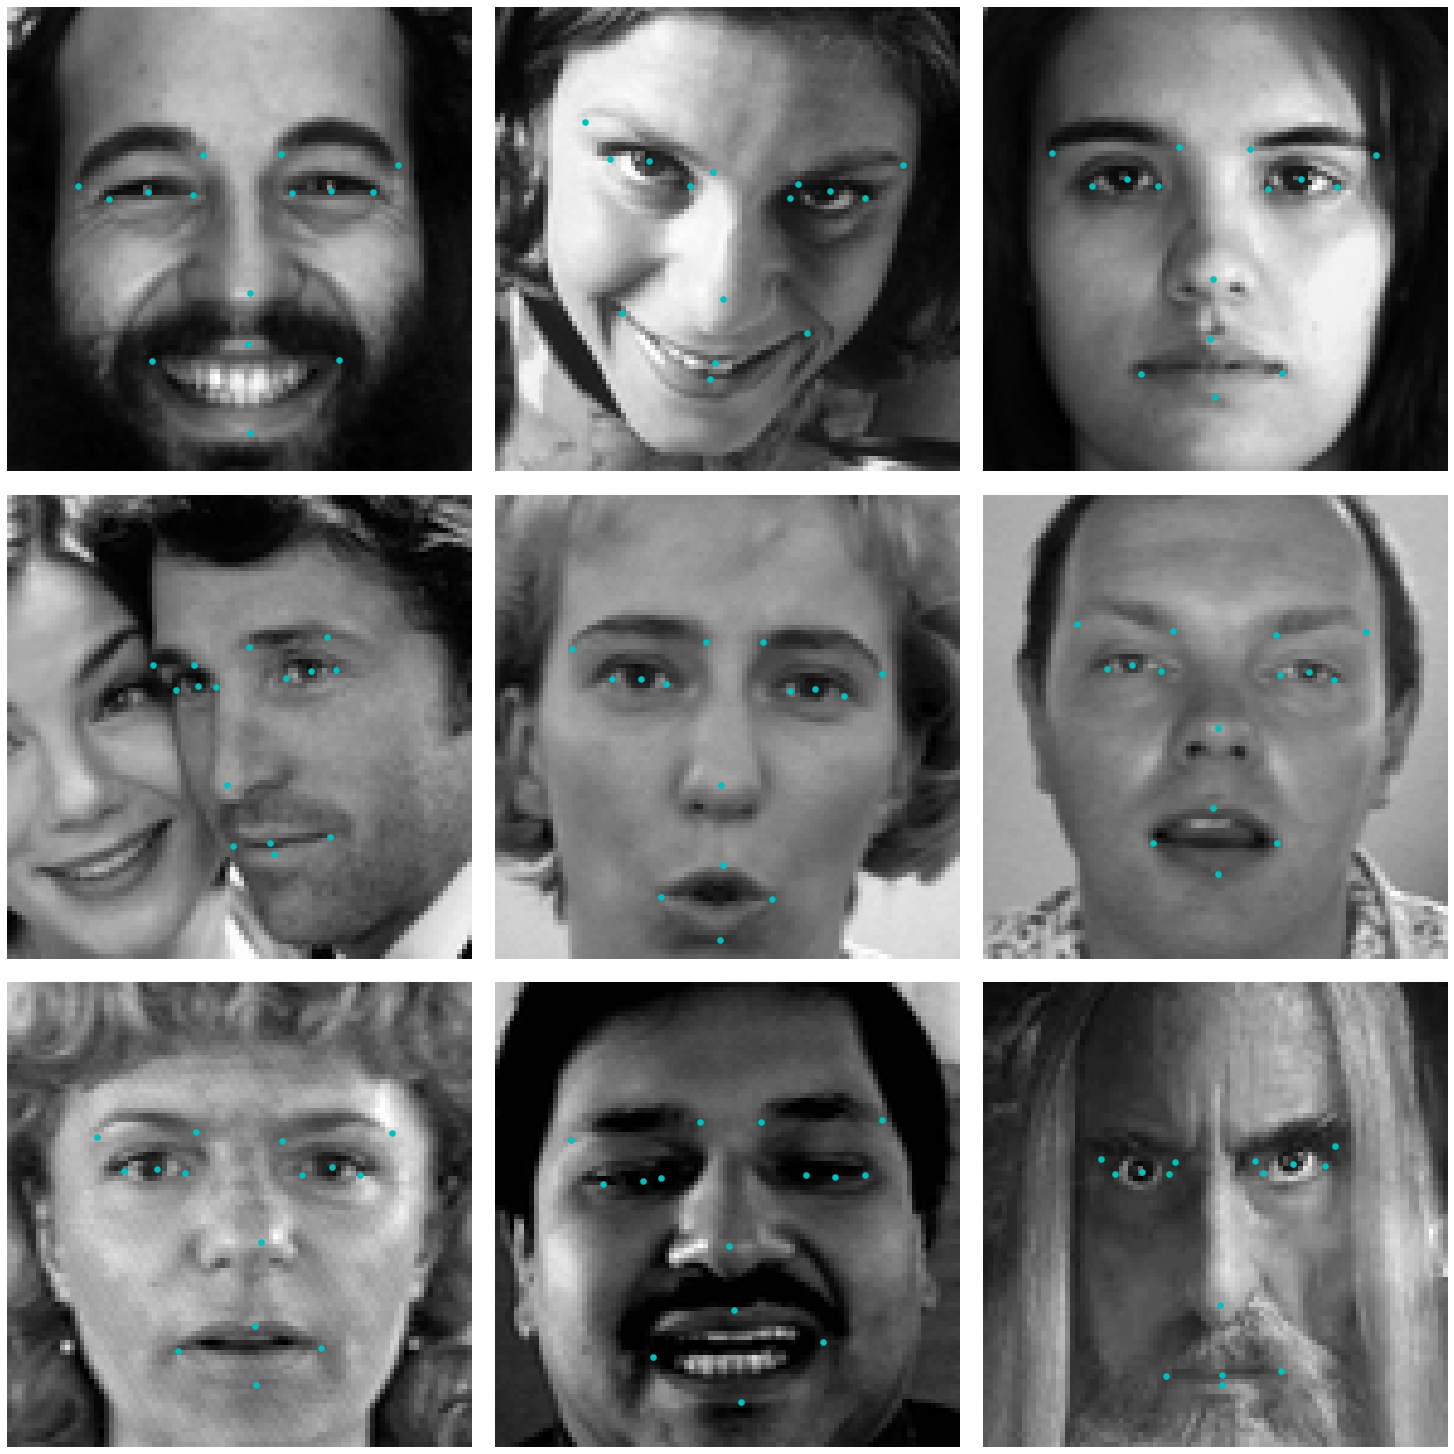

In [559]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_train[i], y_train[i], ax)

In [0]:
# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense
from keras.optimizers import  Adam

In [0]:
def model():
    model = Sequential()
    
    model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(96, 96, 1)))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    

    model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(filters=128 , kernel_size = 3,activation = 'relu'))
    model.add(MaxPooling2D(pool_size=2))
    

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(30))
    
    model.compile(optimizer = 'adam' , loss = 'mse' , metrics =['accuracy'])
    
    return model

In [0]:
model = model()

In [563]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 94, 94, 16)        160       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 8, 8, 64)          36928     
__________

In [564]:
history = model.fit(X_train ,y_train ,epochs = 50  ,validation_split=0.2, batch_size = 100 , verbose = 1, shuffle = True)

Train on 1712 samples, validate on 428 samples
Epoch 1/50
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0480 - acc: 0.2915 - val_loss: 0.0128 - val_acc: 0.6963
Epoch 2/50
1712/1712 [==============================] - 1s 412us/step - loss: 0.0129 - acc: 0.6104 - val_loss: 0.0077 - val_acc: 0.6963
Epoch 3/50
1712/1712 [==============================] - 1s 410us/step - loss: 0.0089 - acc: 0.5917 - val_loss: 0.0056 - val_acc: 0.6963
Epoch 4/50
1712/1712 [==============================] - 1s 424us/step - loss: 0.0069 - acc: 0.6437 - val_loss: 0.0051 - val_acc: 0.6963
Epoch 5/50
1712/1712 [==============================] - 1s 429us/step - loss: 0.0065 - acc: 0.6501 - val_loss: 0.0046 - val_acc: 0.6963
Epoch 6/50
1712/1712 [==============================] - 1s 424us/step - loss: 0.0061 - acc: 0.6595 - val_loss: 0.0046 - val_acc: 0.6963
Epoch 7/50
1712/1712 [==============================] - 1s 425us/step - loss: 0.0058 - acc: 0.6489 - val_loss: 0.0045 - val_acc: 0.6963
Epo

Text(0.5, 0, 'epochs')

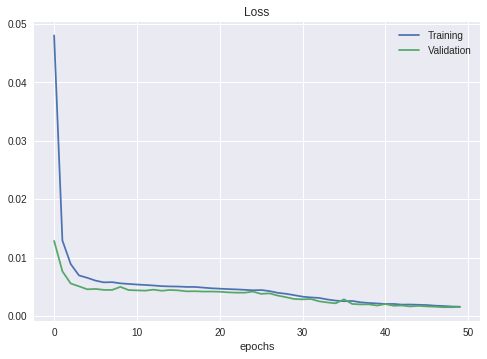

In [565]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training' , 'Validation'])
plt.title('Loss')
plt.xlabel('epochs')